In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from imblearn.over_sampling import SMOTE

from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn import model_selection

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
! pip install shap
import shap
import pickle



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from skle

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491663 sha256=877b67996b6bf299bb55bfa26371f0ae60c58d078bc2d12d329a8ffbd26814f9
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


**Fonctions**

In [3]:
def model (mdl, name, X_name, y_name, X_test_name):
  
  global nm, accuracy, recall, precision, f1,roc_auc, elapsed_train, elapsed_test, confusion, weights
  
  nm = name
  model = mdl
  X_train = X_name
  y_train = y_name
  X_test = X_test_name

  start_time = timeit.default_timer()

  model.fit(X_train, y_train)

  elapsed_train = timeit.default_timer() - start_time

  start_time = timeit.default_timer()

  y_pred = model.predict(X_test)

  elapsed_test = timeit.default_timer() - start_time


  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, zero_division=0)
  precision = precision_score(y_test, y_pred, zero_division=0)
  f1 = f1_score(y_test,y_pred, zero_division=0)
  roc_auc = roc_auc_score(y_test, y_pred)
  
  confusion = confusion_matrix(y_test, y_pred)
  weights = (confusion.ravel()[0]*a + confusion.ravel()[1]*b + confusion.ravel()[2]*c + confusion.ravel()[3]*d) / (a+b+c+d)


def custom_metric(y_test, y_pred):

  data = confusion_matrix(y_test, y_pred)

  return (data.ravel()[0]*a + data.ravel()[1]*b + data.ravel()[2]*c + data.ravel()[3]*d) / (a+b+c+d)


def model_opti (mdl, name, X_name, y_name, params, cv_val):
  
  global nm, accuracy, recall, precision, f1,roc_auc, elapsed_train, elapsed_test, confusion, weights, best_params, best_mdl
  
  nm = name
  model = mdl
  X_train = X_name
  y_train = y_name

  params_grid = params

  grid = GridSearchCV(model,params_grid, cv = cv_val, scoring = custom_scorer)

  start_time = timeit.default_timer()

  grid.fit(X_train,y_train)

  elapsed_train = timeit.default_timer() - start_time

  start_time = timeit.default_timer()

  y_pred = grid.best_estimator_.predict(X_test_std)

  elapsed_test = timeit.default_timer() - start_time

  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, zero_division=0)
  precision = precision_score(y_test, y_pred, zero_division=0)
  f1 = f1_score(y_test,y_pred, zero_division=0)
  roc_auc = roc_auc_score(y_test, y_pred)
  
  confusion = confusion_matrix(y_test, y_pred)
  weights = (confusion.ravel()[0]*a + confusion.ravel()[1]*b + confusion.ravel()[2]*c + confusion.ravel()[3]*d) / (a+b+c+d)
  
  best_params = grid.best_params_
  best_mdl = grid.best_estimator_

**Import Dataset**

In [4]:
app_train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Projet_7/df_final.csv")
app_train = app_train[app_train.columns[1:]]

In [5]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,100002.0,1.0,0,1,0,1,406597.5,24700.5,6,7,4,3,1,0.018801,-3648.0,-2120.0,20.423145,1.0,1.0,0.0,1.0,1.0,0.0,8,2.0,6,10.0,0.0,0.0,0.0,0.0,5,0.083037,0.262949,0.139376,0.025200,0.038300,0.972200,0.634100,0.014400,...,-349.000000,-697.500000,1681.029000,0.000000,108131.945625,49156.200000,7997.141250,0.000000,-499.875000,2,-9.774510,131079.249750,179887.555152,16470.516557,3.016699,1.990798,-7.322679,1.908601,1.052632,-295.000000,11559.247105,24.000000,179055.000,0.00,1.0,0.000000,500.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,0.000000,16.461104,1.0,1.0,1.0,8824.0,202500.0,0.0
1,100003.0,0.0,0,0,0,0,1293502.5,35698.5,1,4,1,1,1,0.003541,-1186.0,-291.0,15.263779,1.0,1.0,0.0,1.0,1.0,0.0,3,1.0,1,11.0,0.0,0.0,0.0,0.0,39,0.311267,0.622246,0.533242,0.092400,0.053800,0.985100,0.804000,0.049700,...,-544.500000,-1097.333333,0.000000,0.000000,254350.125000,0.000000,202500.000000,0.000000,-816.000000,2,-24.999958,97454.912934,274194.442897,37641.500718,3.408183,9.521108,27.448312,1.454572,1.040000,-1378.160000,64754.586000,10.107143,435436.500,3442.50,1.0,0.050030,533.000000,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,0.666667,36.234085,1.0,1.0,0.0,15577.0,135000.0,0.0
2,100004.0,0.0,1,1,1,1,135000.0,6750.0,6,7,4,3,1,0.010032,-4260.0,-2531.0,26.000000,1.0,1.0,1.0,1.0,1.0,0.0,8,2.0,1,9.0,0.0,0.0,0.0,0.0,11,0.549739,0.555912,0.729567,0.100915,0.080185,0.984264,0.775606,0.035539,...,-488.500000,-532.500000,0.000000,0.000000,94518.900000,0.000000,0.000000,0.000000,-532.000000,2,-13.045689,34694.255579,201417.655668,11129.501304,1.806802,3.336162,-0.784368,-4.999101,1.333333,-754.000000,7096.155000,3.750000,24282.000,4860.00,1.0,0.212008,30.000000,4.000000,365243.0,-784.000000,-694.000000,-724.000000,0.000000,20.000000,0.0,0.0,0.0,18821.0,67500.0,0.0
3,100006.0,0.0,0,0,0,1,312682.5,29686.5,6,7,4,0,1,0.008019,-9833.0,-2437.0,13.164939,1.0,1.0,0.0,1.0,0.0,0.0,8,2.0,6,17.0,0.0,0.0,0.0,0.0,5,0.580276,0.650442,0.535752,0.105439,0.076287,0.976547,0.744861,0.031801,...,578.316347,-835.243108,-212660.882083,0.008977,292856.565848,145817.968598,4505.156196,-211.824328,-519.143176,2,-3.500000,0.000000,270000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000,-252.250000,62947.088438,12.000000,272203.260,34840.17,1.0,0.163412,894.222222,23.000000,365243.0,91066.500000,91584.000000,182477.500000,0.000000,10.532818,1.0,1.0,0.0,15966.0,67500.0,0.0
4,100007.0,0.0,0,1,0,1,513000.0,21865.5,6,7,4,3,1,0.028663,-4311.0,-3458.0,12.614294,1.0,1.0,0.0,1.0,0.0,0.0,3,2.0,4,11.0,0.0,0.0,0.0,1.0,37,0.509906,0.322738,0.550610,0.09469

**Séparation variable Target**

In [6]:
X = app_train.drop(["SK_ID_CURR","TARGET"], axis = 1)

y = app_train.TARGET

In [7]:
X.shape, y.shape

((307511, 93), (307511,))

**Split en Train/Test (0.8/0.2)**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((246008, 93), (246008,), (61503, 93), (61503,))

In [10]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
39334,0,0,0,0,755190.0,36459.0,6,7,4,1,5,0.008866,-5307.0,-3341.0,-1.121767,1.0,1.0,0.0,1.0,0.0,0.0,0,2.0,6,16.0,0.0,0.0,0.0,0.0,5,0.857404,0.621932,0.309275,0.071400,0.090700,0.988100,0.843200,0.049834,0.172400,0.166700,...,-386.800000,-1869.000000,0.000000,0.000000,210768.030000,86582.711250,0.000000,0.000000,-382.200000,2,-8.176798,100304.063999,543598.996654,47601.519785,0.174358,3.520177,-6.784213,-2.354895,2.764706,-375.588235,110336.720294,46.117647,900000.000000,30414.851279,1.0,0.061586,-1.000000,48.000000,365243.0,-599.000000,811.000000,-137.000000,0.000000,20.713404,1.0,1.0,1.0,10536.0,45000.0,0.333333
175939,0,1,0,1,69102.0,3879.0,6,7,4,1,1,0.011657,-365.0,-4575.0,8.709105,1.0,1.0,1.0,1.0,1.0,0.0,9,1.0,6,13.0,0.0,0.0,0.0,0.0,4,0.343367,0.284814,0.140243,0.225800,0.165600,0.983100,0.820263,0.094183,0.206900,0.333300,...,202.333333,-796.000000,0.000000,0.000000,162444.600000,127370.700000,335.205000,0.000000,-169.800000,2,-29.767339,110824.732713,143470.201314,2241.428287,1.260502,12.775605,-16.815050,-1.879913,1.029851,-1118.820896,10909.212313,32.088235,155984.625000,5875.500000,1.0,0.102838,100.000000,25.000000,365243.0,-1624.500000,-904.500000,90148.500000,0.250000,17.814385,1.0,1.0,1.0,11835.0,22500.0,0.500000
18593,0,0,0,1,95940.0,10953.0,6,7,4,1,1,0.015221,-1600.0,-174.0,14.098634,1.0,1.0,1.0,1.0,0.0,0.0,11,2.0,1,15.0,0.0,0.0,0.0,0.0,30,0.361411,0.518865,0.447266,0.084000,0.064000,0.975700,0.743334,0.026016,0.137900,0.166700,...,1467.810646,-548.190282,4986.714841,0.009351,203901.822805,150560.429979,2947.154599,285.431994,-343.803885,2,-7.209431,68415.407467,195660.026394,16511.349848,2.626987,1.679112,0.895233,1.126832,1.428571,-426.523810,15790.221429,8.833333,31700.449286,1.215000,1.0,0.000085,3.714286,9.000000,365243.0,-488.500000,-248.500000,-368.500000,0.250000,8.759244,1.0,1.0,0.0,8955.0,56250.0,0.000000
139286,0,0,0,0,454500.0,19255.5,6,3,4,2,1,0.035792,-8151.0,-4198.0,9.510720,1.0,0.0,0.0,1.0,0.0,0.0,8,2.0,6,15.0,0.0,0.0,0.0,0.0,57,0.831181,0.589938,0.720944,0.127163,0.093163,0.978779,0.732837,0.045460,0.150141,0.254402,...,-644.000000,-646.500000,9521.491553,0.000000,213572.250000,0.000000,0.000000,0.000000,-622.500000,2,-6.922896,44154.790042,245139.103108,16724.561474,1.609009,3.522873,-13.299090,-0.475109,1.200000,-113.000000,11517.471000,6.000000,47785.500000,0.000000,1.0,0.000000,100.000000,6.000000,365243.0,-173.000000,-23.000000,-53.000000,1.000000,23.603646,0.0,1.0,1.0,386995.0,76500.0,0.000000
159527,0,0,0,1,244512.0,14958.0,4,3,4,1,1,0.031329,-8187.0,-4573.0,13.029612,1.0,0.0,0.

**Contrôle sur la variable Target du jeu d'entrainement uniquement (y_train)**

In [11]:
y_train.value_counts()

0.0    226050
1.0     19958
Name: TARGET, dtype: int64

In [12]:
y_train.value_counts()/y_train.shape[0]

0.0    0.918873
1.0    0.081127
Name: TARGET, dtype: float64

On constate un déséquilibre entre les classes => Imbalanced data

**Rééquilibrage des classes**

**Undersampling method via Random Sample**

In [13]:
tar_1 = y_train[y_train == 1].index
tar_0 = y_train[y_train == 0].sample(len(tar_1)).index

index = list(set(list(tar_0) + list(tar_1)))

X_train_undersamp = X_train.loc[index]
y_train_undersamp = y_train.loc[index]

In [14]:
X_train_undersamp.shape, y_train_undersamp.shape

((39916, 93), (39916,))

In [15]:
X_train_undersamp

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,0,1,0,1,406597.5,24700.5,6,7,4,3,1,0.018801,-3648.0,-2120.0,20.423145,1.0,1.0,0.0,1.0,1.0,0.0,8,2.0,6,10.0,0.0,0.0,0.0,0.0,5,0.083037,0.262949,0.139376,0.025200,0.038300,0.972200,0.634100,0.014400,0.069000,0.083300,...,-349.000000,-697.500000,1681.029000,0.0,108131.945625,49156.2000,7997.14125,0.0,-499.875000,2,-9.774510,131079.249750,179887.555152,16470.516557,3.016699,1.990798,-7.322679,1.908601,1.052632,-295.000000,11559.247105,24.000000,179055.000000,0.000000,1.000000,0.000000,500.000000,24.000000,365243.000000,-565.000000,125.000000,-25.000000,0.000000,16.461104,1.0,1.0,1.0,8824.0,202500.0,0.000000
131073,0,1,1,1,450000.0,30573.0,5,4,4,1,1,0.026392,-7626.0,-4371.0,17.000000,1.0,1.0,1.0,1.0,1.0,0.0,4,2.0,1,10.0,0.0,0.0,0.0,0.0,1,0.409935,0.619951,0.360613,0.121971,0.081376,1.000700,0.694782,0.063672,0.170233,0.227485,...,424.333333,-2141.000000,558.000000,0.0,434600.025000,189679.5000,0.00000,0.0,-611.666667,2,-21.500000,118763.683875,135000.000000,10031.985000,1.100000,18.000000,0.000000,0.000000,0.729412,-629.705882,9890.476147,15.767123,140349.272727,12177.000000,1.000000,0.156539,436.181818,17.333333,312903.714286,-1001.571429,51725.428571,51584.000000,0.285714,14.718870,0.0,1.0,5.0,14699.0,63000.0,0.000000
131074,0,1,1,1,1180129.5,38200.5,6,4,4,1,1,0.010006,-5270.0,-3920.0,15.000000,1.0,1.0,0.0,1.0,1.0,0.0,4,2.0,6,9.0,0.0,0.0,0.0,0.0,30,0.485871,0.575829,0.353988,0.091400,0.087100,0.984600,0.797500,0.103000,0.206900,0.166700,...,4297.500000,-1013.875000,0.000000,0.0,746046.750000,145166.7825,10127.68500,0.0,-529.000000,2,-49.000000,0.000000,35526.315789,0.000000,0.000000,0.000000,0.000000,0.000000,1.833333,-1262.111111,101059.147500,18.000000,266940.450000,1864.125000,1.000000,0.041726,103.000000,8.500000,365243.000000,-1491.000000,-921.000000,-1266.000000,0.500000,30.893038,1.0,1.0,2.0,12057.0,112500.0,0.000000
5,0,1,0,1,490495.5,27517.5,5,4,4,1,1,0.035792,-4970.0,-477.0,12.461249,1.0,1.0,1.0,1.0,1.0,0.0,8,2.0,6,16.0,0.0,0.0,0.0,0.0,33,0.549414,0.354225,0.621226,0.123524,0.086780,0.972887,0.740563,0.044740,0.144800,0.239852,...,-391.333333,-909.000000,0.000000,0.0,156148.500000,80019.0000,0.00000,0.0,-611.000000,2,-27.196942,44387.498980,201146.817616,14388.412933,1.425201,12.664776,8.714118,0.625111,1.028571,-1263.914286,27360.502714,11.518072,155701.800000,5548.500000,1.000000,0.073051,73.000000,14.000000,365243.000000,-1434.500000,-1044.500000,-1209.500000,0.250000,17.824857,1.0,1.0,2.0,15353.0,49500.0,0.000000
262149,0,0,0,1,526491.0,19039.5,6,3,4,1,1,0.028663,-5846.0,-2389.0,15.186306,1.0,0.0,0.0,1.

In [16]:
y_train_undersamp

0         1.0
131073    1.0
131074    0.0
5         0.0
262149    0.0
         ... 
131057    0.0
131064    0.0
131066    0.0
262140    1.0
262142    1.0
Name: TARGET, Length: 39916, dtype: float64

In [17]:
y_train_undersamp.value_counts()

0.0    19958
1.0    19958
Name: TARGET, dtype: int64

In [18]:
y_train_undersamp.value_counts()/y_train_undersamp.shape[0]

0.0    0.5
1.0    0.5
Name: TARGET, dtype: float64

**Oversampling method via SMOTE**

In [19]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=5) #'minority

X_train_oversamp, y_train_oversamp = sm.fit_sample(X_train, y_train)

X_train_oversamp = pd.DataFrame(X_train_oversamp, columns=X_train.columns)
y_train_oversamp = pd.DataFrame(y_train_oversamp)

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


In [20]:
X_train_oversamp.shape, y_train_oversamp.shape

((452100, 93), (452100, 1))

In [21]:
X_train_oversamp

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,0.0,0.000000,0.000000,0.000000,755190.000000,36459.000000,6.000000,7.0,4.000000,1.000000,5.000000,0.008866,-5307.000000,-3341.000000,-1.121767,1.0,1.0,0.000000,1.0,0.000000,0.0,0.000000,2.000000,6.000000,16.000000,0.0,0.0,0.0,0.000000,5.000000,0.857404,0.621932,0.309275,0.071400,0.090700,0.988100,0.843200,0.049834,0.172400,0.166700,...,-386.800000,-1869.000000,0.000000,0.000000,210768.030000,86582.711250,0.000000,0.000000,-382.200000,2.000000,-8.176798,100304.063999,543598.996654,47601.519785,0.174358,3.520177,-6.784213,-2.354895,2.764706,-375.588235,110336.720294,46.117647,900000.000000,30414.851279,1.0,0.061586,-1.000000,48.000000,365243.000000,-599.000000,811.000000,-137.000000,0.000000,20.713404,1.000000,1.0,1.000000,10536.000000,45000.000000,0.333333
1,0.0,1.000000,0.000000,1.000000,69102.000000,3879.000000,6.000000,7.0,4.000000,1.000000,1.000000,0.011657,-365.000000,-4575.000000,8.709105,1.0,1.0,1.000000,1.0,1.000000,0.0,9.000000,1.000000,6.000000,13.000000,0.0,0.0,0.0,0.000000,4.000000,0.343367,0.284814,0.140243,0.225800,0.165600,0.983100,0.820263,0.094183,0.206900,0.333300,...,202.333333,-796.000000,0.000000,0.000000,162444.600000,127370.700000,335.205000,0.000000,-169.800000,2.000000,-29.767339,110824.732713,143470.201314,2241.428287,1.260502,12.775605,-16.815050,-1.879913,1.029851,-1118.820896,10909.212313,32.088235,155984.625000,5875.500000,1.0,0.102838,100.000000,25.000000,365243.000000,-1624.500000,-904.500000,90148.500000,0.250000,17.814385,1.000000,1.0,1.000000,11835.000000,22500.000000,0.500000
2,0.0,0.000000,0.000000,1.000000,95940.000000,10953.000000,6.000000,7.0,4.000000,1.000000,1.000000,0.015221,-1600.000000,-174.000000,14.098634,1.0,1.0,1.000000,1.0,0.000000,0.0,11.000000,2.000000,1.000000,15.000000,0.0,0.0,0.0,0.000000,30.000000,0.361411,0.518865,0.447266,0.084000,0.064000,0.975700,0.743334,0.026016,0.137900,0.166700,...,1467.810646,-548.190282,4986.714841,0.009351,203901.822805,150560.429979,2947.154599,285.431994,-343.803885,2.000000,-7.209431,68415.407467,195660.026394,16511.349848,2.626987,1.679112,0.895233,1.126832,1.428571,-426.523810,15790.221429,8.833333,31700.449286,1.215000,1.0,0.000085,3.714286,9.000000,365243.000000,-488.500000,-248.500000,-368.500000,0.250000,8.759244,1.000000,1.0,0.000000,8955.000000,56250.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,454500.000000,19255.500000,6.000000,3.0,4.000000,2.000000,1.000000,0.035792,-8151.000000,-4198.000000,9.510720,1.0,0.0,0.000000,1.0,0.000000,0.0,8.000000,2.000000,6.000000,15.000000,0.0,0.0,0.0,0.000000,57.000000,0.831181,0.589

In [22]:
y_train_oversamp

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
452095,1.0
452096,1.0
452097,1.0
452098,1.0


In [23]:
y_train_oversamp.value_counts()

1.0    226050
0.0    226050
dtype: int64

In [24]:
y_train_oversamp.value_counts()/y_train_oversamp.shape[0]

1.0    0.5
0.0    0.5
dtype: float64

**Standardisation des valeurs over/under samplés & X_test**

In [25]:
std_scale = preprocessing.StandardScaler().fit(X_train_undersamp)
X_train_undersamp_std = std_scale.transform(X_train_undersamp)
X_train_undersamp_std = pd.DataFrame(X_train_undersamp_std, columns = X.columns)

std_scale = preprocessing.StandardScaler().fit(X_train_oversamp)
X_train_oversamp_std = std_scale.transform(X_train_oversamp)
X_train_oversamp_std = pd.DataFrame(X_train_oversamp_std, columns = X.columns)

std_scale = preprocessing.StandardScaler().fit(X_test)
X_test_std = std_scale.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns = X.columns)


In [26]:
X_train_undersamp_std.shape,X_train_oversamp_std.shape

((39916, 93), (452100, 93))

In [27]:
X_train_undersamp_std

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,-0.30105,1.267614,-0.696517,0.668830,-0.458570,-0.155457,0.428998,0.841038,0.572354,1.345627,-0.330177,-0.102562,0.323714,0.495827,0.565758,0.0,0.422541,-0.531956,0.043097,1.669998,-0.244121,0.006873,-0.192424,1.343447,-0.593674,-0.125506,-0.237247,-0.32569,-0.596294,-1.148424,-2.003496,-0.991961,-1.654872,-1.005141,-0.719636,-0.064501,-1.380425,-0.382201,-1.013325,-1.127927,...,-0.384374,0.279178,-0.031183,-0.139291,-0.401860,-0.237775,0.107681,-0.03379,-0.010112,0.338997,0.608267,0.670000,-0.144228,0.013947,0.347396,-0.699949,-0.231651,0.155986,0.065624,0.970427,-0.280078,1.148169,0.206615,-0.405186,0.099576,-0.918354,0.000930,1.070024,0.442362,-0.294095,-0.522266,-0.767167,-0.876268,-0.631188,0.703708,0.196029,-0.499518,-0.448040,0.538605,-0.656084
1,-0.30105,1.267614,1.435715,0.668830,-0.344223,0.276887,-0.146440,-0.334564,0.572354,-0.399574,-0.330177,0.477679,-0.832813,-0.989874,0.299292,0.0,0.422541,1.879853,0.043097,1.669998,-0.244121,-1.075414,-0.192424,-0.985464,-0.593674,-0.125506,-0.237247,-0.32569,-0.596294,-1.345366,-0.310921,0.729869,-0.509450,0.231824,0.038188,0.485570,-0.668224,0.497864,0.427203,0.257052,...,-0.149387,-2.576646,-0.038291,-0.139291,0.141945,0.062162,-0.243281,-0.03379,-0.254741,0.338997,-0.208339,0.514880,-0.482188,-0.305588,-0.352525,0.940295,-0.089845,-0.091898,-0.508269,0.406207,-0.353591,0.116878,-0.057474,0.353331,0.099576,0.945300,-0.002223,0.290252,-0.447939,-0.305438,0.297977,-0.296379,0.035127,-0.861670,-1.421043,0.196029,1.275577,-0.404309,-0.139538,-0.656084
2,-0.30105,1.267614,1.435715,0.668830,1.579351,0.838438,0.428998,-0.334564,0.572354,-0.399574,-0.330177,-0.774835,-0.147851,-0.692206,0.143607,0.0,0.422541,-0.531956,0.043097,1.669998,-0.244121,-1.075414,-0.192424,1.343447,-0.899435,-0.125506,-0.237247,-0.32569,-0.596294,0.082463,0.082255,0.517068,-0.543750,-0.158947,0.138896,0.174829,0.537326,1.200302,0.948970,-0.326821,...,1.027523,-0.346739,-0.041823,-0.139291,0.660728,-0.032847,0.201182,-0.03379,-0.073845,0.338997,-2.123539,-0.981000,-1.231131,-0.803460,-0.754212,-0.903919,-0.089845,-0.091898,1.451800,-0.659849,3.662615,0.396579,0.806256,-0.289068,0.099576,-0.421588,-0.018680,-0.742946,0.442362,-0.318155,-0.538893,-0.778487,0.718673,1.278026,0.703708,0.196029,-0.055744,-0.423975,0.101094,-0.656084
3,-0.30105,1.267614,-0.696517,0.668830,-0.237535,0.051936,-0.146440,-0.334564,0.572354,-0.399574,-0.330177,1.196197,-0.060632,1.580236,-0.054016,0.0,0.422541,1.879853,0.043097,1.669998,-0.244121,0.006873,-0.192424,1.343447,1.240892,-0.125506,-0.237247,-0.32569,-0.596294,

In [28]:
X_train_oversamp_std

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,-0.31596,-0.850102,-0.747576,-1.609756,0.466389,0.730606,0.465359,0.904319,0.605058,-0.418208,3.886636,-0.918872,-0.175383,-0.330803,-1.508686,0.001487,0.424768,-0.572705,0.043286,-0.645707,-0.261537,-2.357537,-0.216501,1.458711,1.345301,-0.140002,-0.256364,-0.363081,-0.653852,-1.220959,2.139312,0.814335,-0.826807,-0.457161,0.235144,0.278112,1.220422,0.328966,0.509162,-0.344296,...,-0.431678,-2.192873,-0.028734,-0.152511,-0.194100,-0.171312,-0.236810,-0.018510,0.289161,0.363774,0.744193,0.278388,2.526267,1.535612,-0.698746,-0.573388,-0.379854,-0.562098,3.378095,0.859268,4.381891,4.196238,5.331629,1.638704,0.109829,-0.188114,-0.059946,4.108387,0.438626,-0.293720,-0.507205,-0.769802,-0.926390,-0.070571,0.746309,0.20385,-0.520207,-0.437381,-0.285516,1.055757
1,-0.31596,1.378314,-0.747576,0.731738,-1.357836,-1.735673,0.465359,0.904319,0.605058,-0.418208,-0.364642,-0.688559,1.370395,-1.206463,-0.469517,0.001487,0.424768,2.048713,0.043286,1.804446,-0.261537,0.295375,-2.344534,1.458711,0.353263,-0.140002,-0.256364,-0.363081,-0.653852,-1.272943,-0.681583,-0.948551,-1.761754,1.789071,1.700728,0.164820,0.913077,1.310294,1.047786,1.411867,...,-0.234096,0.087886,-0.028734,-0.152511,-0.262533,-0.074226,-0.221351,-0.018510,0.843269,0.363774,-0.838121,0.409822,-0.408457,-0.670399,-0.298718,0.445145,-0.724734,-0.475163,0.020819,-0.448363,-0.317996,2.318332,0.065718,-0.029656,0.109829,0.348690,-0.044194,1.264561,0.438626,-0.321305,-0.535174,0.063083,-0.080967,-0.468503,0.746309,0.20385,-0.520207,-0.427737,-0.426201,1.932691
2,-0.31596,-0.850102,-0.747576,0.731738,-1.286477,-1.200177,0.465359,0.904319,0.605058,-0.418208,-0.364642,-0.394458,0.984107,1.916533,0.100181,0.001487,0.424768,2.048713,0.043286,-0.645707,-0.261537,0.884911,-0.216501,-1.067561,1.014622,-0.140002,-0.256364,-0.363081,-0.653852,0.078647,-0.582559,0.275365,-0.063554,-0.273855,-0.287300,-0.002851,-0.117738,-0.198033,-0.029461,-0.344296,...,0.190315,0.614628,-0.006254,0.021354,-0.203824,-0.019029,-0.100889,0.050371,0.389328,0.363774,0.815089,-0.119996,-0.025673,0.023594,0.204560,-0.775991,-0.115819,0.075158,0.792420,0.769653,-0.087274,-0.794453,-0.813927,-0.429032,0.109829,-0.988439,-0.059211,-0.713753,0.438626,-0.290748,-0.524478,-0.771938,-0.080967,-1.711453,0.746309,0.20385,-0.988050,-0.449119,-0.215174,-0.698111
3,-0.31596,-0.850102,-0.747576,-1.609756,-0.333109,-0.571685,0.465359,-0.779775,0.605058,0.503879,-0.364642,1.303061,-1.064940,-0.938940,-0.384783,0.001487,-2.357575,-0.572705,0.043286,-0.645707,-0.261537,0.000607,-0.216501,1.458711,1.014622,-0.140002,-

In [29]:
X_test_std

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,-0.326172,1.388982,1.402295,-1.504650,-0.495192,-0.280458,0.439534,-0.260411,-1.683176,-0.410030,-0.306613,1.068846,0.628852,-1.870805,-0.504540,0.0,0.468972,-0.496985,0.04403,-0.623488,-0.245422,0.573530,-0.096406,1.354877,-0.943881,-0.125656,-0.234007,-0.292393,-0.546669,0.026473,0.549507,1.058256,0.318165,0.107216,0.153917,-0.399137,-0.136286,0.171834,-0.571267,0.630584,...,-0.518160,-0.522949,1.769387,-0.124167,0.005594,-0.329444,-0.216578,-0.015000,-0.601278,0.308197,-1.320216,-0.947334,-1.545882,-0.762866,-0.708349,-0.935772,-0.099092,-0.080313,0.162065,-1.885423,0.199534,-1.029063,-0.371834,-0.095272,0.094537,-0.092695,-0.025035,-0.810702,0.407834,0.694345,0.135399,-0.393420,-0.525430,-0.545044,0.740760,0.203411,-0.511221,-0.484806,-0.238422,1.046187
1,-0.326172,-0.719743,-0.713117,0.664607,1.107377,2.143878,-2.373440,0.918511,0.625417,-0.410030,-0.306613,-0.884005,-0.011050,-1.357224,0.274036,0.0,0.468972,-0.496985,0.04403,-0.623488,-0.245422,0.024560,-0.096406,-0.038289,-0.332400,-0.125656,-0.234007,-0.292393,-0.546669,-1.196529,-0.548015,0.798907,-0.289681,-0.250399,-0.268680,0.103531,-0.010588,-0.137279,0.883775,-0.409203,...,-0.709072,-1.159591,0.201252,-0.124167,-0.213013,-0.329444,-0.216578,-0.015000,-2.222915,0.308197,0.216484,0.621191,0.076271,-0.134185,0.178405,-0.001766,0.076386,0.145708,-0.070066,0.229936,-0.436910,-0.625697,-0.824493,-0.275432,0.094537,-0.108238,0.034120,-1.027392,0.407834,-0.331502,-0.526831,-0.772625,-0.884391,-0.474707,0.740760,0.203411,0.387317,-0.478426,-0.433301,1.046187
2,-0.326172,1.388982,1.402295,-1.504650,1.896446,1.850589,-2.373440,0.918511,0.625417,-0.410030,-0.306613,0.707436,0.562959,1.212002,-0.662827,0.0,0.468972,-0.496985,0.04403,-0.623488,-0.245422,-1.073381,-0.096406,0.426099,0.890560,-0.125656,-0.234007,-0.292393,1.829261,-1.196529,0.383703,1.156869,-1.511746,-0.166612,-0.157765,-0.307836,0.624467,-0.554316,-0.180287,-0.030487,...,1.601964,1.153146,-0.051458,-0.124167,-0.340068,-0.230179,-0.139811,-0.015000,0.861389,0.308197,0.037209,0.068716,-0.041208,-0.019409,-0.367630,0.153321,-0.099092,-0.080313,-1.480862,0.148020,0.311193,-1.148134,0.567124,0.255691,0.094537,1.606069,-0.027774,0.272747,-1.263317,-0.331323,0.995098,0.095219,-0.884391,0.459703,0.740760,0.203411,1.285855,-0.462217,0.151337,1.046187
3,-0.326172,-0.719743,1.402295,0.664607,-0.220222,-0.378530,0.439534,0.918511,0.625417,-1.261100,-0.306613,-0.146762,-0.715141,-1.357224,0.920044,0.0,0.468972,2.012133,0.04403,-0.623488,-0.245422,0.024560,-0.096406,1.354877,1.502041,-0.125656,-0.234007,-0.2923

**Modèles avant Optimisation**

In [30]:
results = pd.DataFrame({})

**Poids Scoring**

**True négatif => 1 / Faux positif => 3 / Faux négatif => 10 / Vrai positif => 1**

Faux positif => Perte de clients - Modèle dit négatif alors qu'en réalité c'est positif

Faux négatif => Prêt accordé à des clients pas ok

In [31]:
a,b,c,d= 1, 3, 10, 1

**Dummy Classifier**

In [32]:
dum_class = DummyClassifier(strategy='most_frequent',
                            random_state=14)

model(dum_class, "Dummy_Classifier Under_Samp",X_train_undersamp_std, y_train_undersamp,X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

In [33]:
model(dum_class, "Dummy_Classifier Over_Samp",X_train_oversamp_std, y_train_oversamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

**Gaussian Naive Bayes**

In [34]:
gnb_class = GaussianNB()

model(gnb_class, "Gaussian_NB Under_Samp",X_train_undersamp_std, y_train_undersamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

In [35]:
model(gnb_class, "Gaussian_NB Over_Samp",X_train_oversamp_std, y_train_oversamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


**LGBM**

In [36]:
lgbm_class = LGBMClassifier()

model(lgbm_class, "Light_GBM Under_Samp",X_train_undersamp_std, y_train_undersamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

In [37]:
model(lgbm_class, "Light_GBM Over_Samp",X_train_oversamp_std, y_train_oversamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


**Random Forest**

In [38]:
rf = RandomForestClassifier()

model(rf, "RFC Under_Samp",X_train_undersamp_std, y_train_undersamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

In [39]:
model(rf, "RFC Over_Samp",X_train_oversamp_std, y_train_oversamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


**XGB**

In [40]:
xg = XGBClassifier()

model(xg, "XGB Classifier Under_Samp",X_train_undersamp_std, y_train_undersamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

In [41]:
model(xg, "XGB Classifier Over_Samp",X_train_oversamp_std, y_train_oversamp, X_test_std)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


**Choix Modèles avant optimisation**

Accuracy : Number of correct predictions

Recall : The recall is intuitively the ability of the classifier to find all the positive samples

Precision : The precision is intuitively the ability of the classifier not to label as positive a sample that is negative

F1 : It's the weighted average of the precision and recall

Auc_Score : AUC represents the probability that a random positive example is positioned to the right of a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.







In [42]:
results

,Nom du modèle,Accuracy,Recall,Precision,F1,Auc_Score,Scoring_weights,Temps de train,Temps de test
0,Dummy_Classifier Under_Samp,0.920866,0.000000,0.000000,0.000000,0.500000,7020.400000,0.004410,0.001414
0,Dummy_Classifier Over_Samp,0.920866,0.000000,0.000000,0.000000,0.500000,7020.400000,0.028374,0.000755
0,Gaussian_NB Under_Samp,0.382290,0.859051,0.100781,0.180398,0.600185,9485.800000,0.062966,0.080553
0,Gaussian_NB Over_Samp,0.920801,0.000000,0.000000,0.000000,0.499965,7020.933333,0.612391,0.078192
0,Light_GBM Under_Samp,0.650716,0.846517,0.165761,0.277236,0.740204,7313.066667,4.332100,0.395789
0,Light_GBM Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,33.782687,0.298627
0,RFC Under_Samp,0.627839,0.830286,0.154804,0.260954,0.720364,7537.533333,26.802170,2.105816
0,RFC Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,466.088266,0.778613
0,XGB Classifier Under_Samp,0.651464,0.831724,0.164119,0.274143,0.733849,7340.533333,15.368258,0.299305
0,XGB Classifier Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,261.137866,0.304883


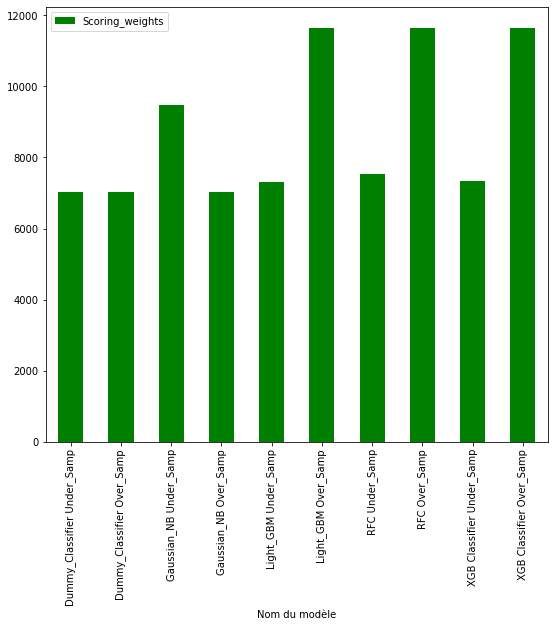

In [43]:
results.plot(x="Nom du modèle", y="Scoring_weights", kind="bar",figsize=(9,8), color='green')
plt.show()

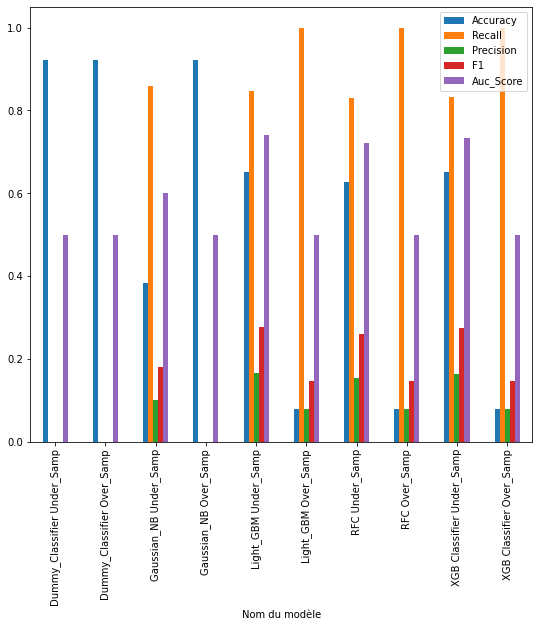

In [44]:
results.plot(x="Nom du modèle", y=results.columns[1:6], kind="bar",figsize=(9,8))
plt.show()

**Modèles Retenus**

Light GBM Under_Samp

RFC Under_Samp

XGB Under_Samp


**Optimisation des modèles**

In [45]:
custom_scorer = make_scorer(custom_metric, greater_is_better = False)

**Light GBM Under_Samp**

In [46]:
param_grid = {'num_leaves': np.arange(10, 100, 10), 
              'max_depth' : np.arange(5,15,5),
              'learning_rate': np.arange(0.2, 1.0, 0.2)
              }

model_opti(lgbm_class, "Light_GBM Under_Samp Opti", X_train_undersamp_std, y_train_undersamp, param_grid, 5)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test],
                                       'Best_params':[best_params]}))

lgbm_best_mdl = best_mdl

**XGB Under_Samp**

In [47]:
param_grid = {
    'n_estimators' : np.arange(50,500,50),
    'learning_rate': [0.01, 0.1]
    }

model_opti(xg, "XGB Under_Samp Opti", X_train_undersamp_std, y_train_undersamp, param_grid, 5)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test],
                                       'Best_params':[best_params]}))

xg_best_mdl = best_mdl

**RFC Under_Sample**

In [48]:
param_grid = { 
    'n_estimators': np.arange(200, 1000,200),
    'max_depth' : np.arange(5,15,5)
}

model_opti(rf, "RFC Under_Samp Opti", X_train_undersamp_std, y_train_undersamp, param_grid, 5)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test],
                                       'Best_params':[best_params]}))

rfc_best_mdl = best_mdl

**Interpretabilité des modèles**

In [49]:
results

,Nom du modèle,Accuracy,Recall,Precision,F1,Auc_Score,Scoring_weights,Temps de train,Temps de test,Best_params
0,Dummy_Classifier Under_Samp,0.920866,0.000000,0.000000,0.000000,0.500000,7020.400000,0.004410,0.001414,NaN
0,Dummy_Classifier Over_Samp,0.920866,0.000000,0.000000,0.000000,0.500000,7020.400000,0.028374,0.000755,NaN
0,Gaussian_NB Under_Samp,0.382290,0.859051,0.100781,0.180398,0.600185,9485.800000,0.062966,0.080553,NaN
0,Gaussian_NB Over_Samp,0.920801,0.000000,0.000000,0.000000,0.499965,7020.933333,0.612391,0.078192,NaN
0,Light_GBM Under_Samp,0.650716,0.846517,0.165761,0.277236,0.740204,7313.066667,4.332100,0.395789,NaN
0,Light_GBM Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,33.782687,0.298627,NaN
0,RFC Under_Samp,0.627839,0.830286,0.154804,0.260954,0.720364,7537.533333,26.802170,2.105816,NaN
0,RFC Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,466.088266,0.778613,NaN
0,XGB Classifier Under_Samp,0.651464,0.831724,0.164119,0.274143,0.733849,7340.533333,15.368258,0.299305,NaN
0,XGB Classifier Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,261.137866,0.304883,NaN


**Meilleur modèle : XGB Under_Samp Opti**

In [59]:
mdl_final = xg_best_mdl
mdl_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=450, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Interpreation via Shap**

In [60]:
exp = shap.Explainer(mdl_final, X_test)
val = exp.shap_values(X_test)
pd.DataFrame(val, columns=X_test.columns).head(5)

100%|===================| 61372/61503 [05:30<00:00]       

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,...,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,CREDIT_ACTIVE,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,CNT_DRAWINGS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NUM_INSTALMENT_VERSION,DAYS_INSTALMENT,AMT_PAYMENT,CNT_INSTALMENT,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,PERIOD,OVER_EXPECT_CREDIT,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,INCOME_PER_FAMILY_MEMBER,CHILDREN_RATIO
0,0.0,0.079587,-0.264641,0.0,0.0,0.0,0.0,0.0,0.0,0.005625,-0.006285,0.0,0.000104,0.0,-0.001437,0.0,0.0,0.0,0.0,-0.048390,0.0,0.0,0.0,0.008025,0.0,0.0,0.0,0.0,0.164661,0.0,-0.077834,-0.026200,0.022718,-0.004943,-0.011451,0.0,-0.003766,0.0,0.053431,0.0,...,-0.041074,0.0,0.438695,-0.001197,0.0,0.329954,0.007456,0.036728,0.0,0.000937,0.000155,0.097237,0.0,-0.038341,-0.013567,0.025272,-0.210912,-0.027263,0.0,0.0,0.0,0.0,0.0,0.028764,0.0,-0.000144,-0.112490,0.0,0.0,-0.003100,-0.163951,-0.047603,-0.110864,0.0,0.0,0.003321,0.026423,0.0,0.0,-0.039192
1,0.0,-0.052006,0.166520,0.0,0.0,0.0,0.0,0.0,0.0,0.001607,0.000000,0.0,-0.000097,0.0,-0.001253,0.0,0.0,0.0,0.0,-0.057925,0.0,0.0,0.0,0.007887,0.0,0.0,0.0,0.0,0.191927,0.0,0.081145,-0.027776,0.022718,-0.001175,-0.003134,0.0,-0.005272,0.0,-0.084332,0.0,...,-0.015036,0.0,0.410425,-0.001197,0.0,0.352173,0.018904,0.046218,0.0,0.000937,0.000854,0.006112,0.0,0.015718,0.005929,-0.008048,0.416541,0.032725,0.0,0.0,0.0,0.0,0.0,0.055485,0.0,-0.000360,-0.116866,0.0,0.0,-0.024144,0.148859,0.069994,-0.090587,0.0,0.0,0.004809,-0.152115,0.0,0.0,-0.049751
2,0.0,0.081535,-0.232982,0.0,0.0,0.0,0.0,0.0,0.0,0.005625,0.000000,0.0,0.000104,0.0,-0.001297,0.0,0.0,0.0,0.0,-0.049043,0.0,0.0,0.0,0.007887,0.0,0.0,0.0,0.0,-0.437999,0.0,-0.058066,-0.055433,0.139003,-0.003489,-0.005769,0.0,-0.005110,0.0,0.053431,0.0,...,-0.002641,0.0,-0.248250,-0.001197,0.0,-0.095998,-0.032741,0.047731,0.0,0.000937,0.000155,0.003984,0.0,0.019224,0.004223,-0.009517,-0.280478,0.010219,0.0,0.0,0.0,0.0,0.0,0.067529,0.0,-0.000144,-0.110194,0.0,0.0,-0.006904,-0.140505,-0.015731,-0.098511,0.0,0.0,0.002230,-0.146603,0.0,0.0,-0.046331
3,0.0,-0.036324,-0.241131,0.0,0.0,0.0,0.0,0.0,0.0,-0.012456,0.000000,0.0,0.000104,0.0,0.000390,0.0,0.0,0.0,0.0,-0.062554,0.0,0.0,0.0,0.007887,0.0,0.0,0.0,0.0,0.189634,0.0,-0.159740,-0.027776,-0.014469,0.002812,-0.002959,0.0,-0.005874,0.0,-0.031636,0.0,...,-0.013366,0.0,-0.327696,-0.001197,0.0,-0.097868,0.018904,0.045171,0.0,0.000937,0.000854,0.004428,0.0,0.016910,-0.031774,0.004042,0.419853,-0.016504,0.0,0.0,0.0,0.0,0.0,0.075196,0.0,-0.000360,-0.110339,0.0,0.0,-0.001702,0.139091,0.053781,-0.090415,0.0,0.0,0.003958,0.031936,0.0,0.0,-0.034798
4,0.0,-0.043817,0.142665,0.0,0.0,0.0,0.0,0.0,0.0,0.001607,0.000000,0.0,0.000104,0.0,0.000704,0.0,0.0,0.0,0.0,-0.059905,0.0,0.0,0.0,-0.022732,0.0,0.0,0.0,0.0,0.155829,0.0,-0.486248,-0.027776,0.072802,-0.003351,-0.005859,0.0,-0.002242,0.0,-0.029973,0.0,...,0.004839,0.0,0.412728,-0.001197,0.0,-0.095998,0.018904,0.039806,0.0,0.000937,0.000265,0.006057,0.0,0.015852,0.004223,

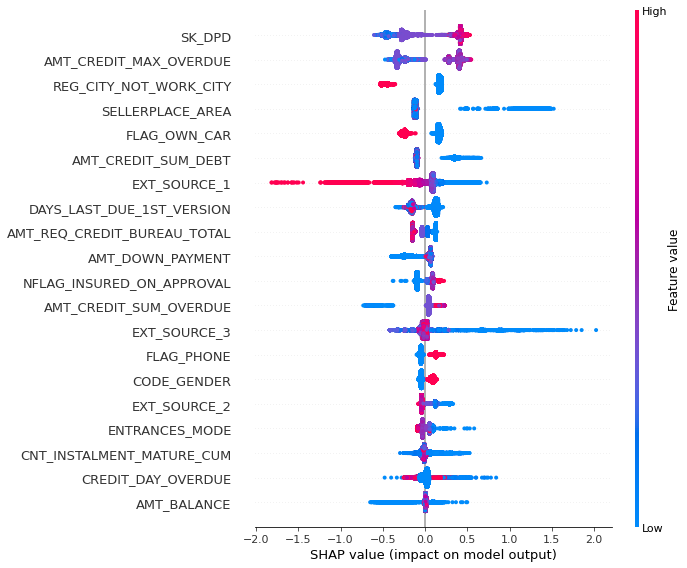

In [61]:
shap.summary_plot(val, X_test)

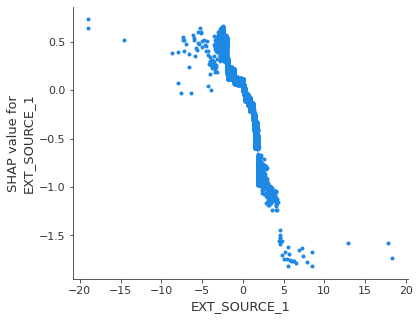

In [62]:
shap.dependence_plot("EXT_SOURCE_1", val, X_test_std, interaction_index=None)

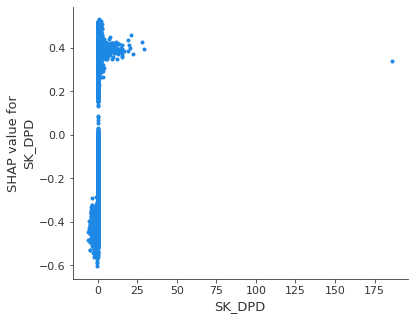

In [63]:
shap.dependence_plot("SK_DPD", val, X_test_std, interaction_index=None)

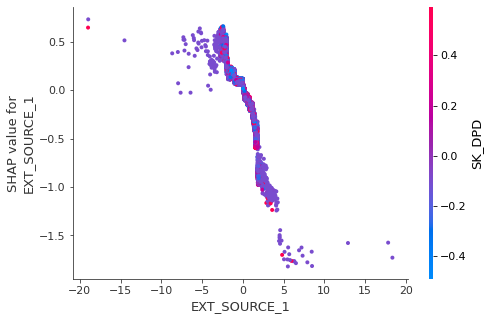

In [64]:
shap.dependence_plot("EXT_SOURCE_1", val, X_test_std, interaction_index="SK_DPD")

In [56]:
index_indiv = 0

In [66]:
print("Prediction de l'invidu à l'index",index_indiv,":",mdl_final.predict(X_test_std)[index_indiv])
shap.initjs()
shap.force_plot(exp.expected_value,val[index_indiv,:],X_test_std.iloc[index_indiv,:])

Prediction de l'invidu à l'index 0 : 0.0


The red features drives our prediction to be 0: client not in default. 3 most contributing features are as follows: Ext 2 / Birth Employed / Amt credit Max overdue

The blue features indicate features reducing the probability of the patient to be at 0.

**Réduction aux colonnes les plus importantes**

In [65]:
columns = ["EXT_SOURCE_1", "EXT_SOURCE_2","EXT_SOURCE_3",
           "AMT_BALANCE","AMT_CREDIT_MAX_OVERDUE","AMT_CREDIT_SUM_DEBT","AMT_REQ_CREDIT_BUREAU_TOTAL","AMT_DOWN_PAYMENT","AMT_CREDIT_SUM_OVERDUE",
           "SK_DPD","REG_CITY_NOT_WORK_CITY","SELLERPLACE_AREA","FLAG_OWN_CAR","DAYS_LAST_DUE_1ST_VERSION","NFLAG_INSURED_ON_APPROVAL","FLAG_PHONE","CODE_GENDER",
           "ENTRANCES_MODE","CNT_INSTALMENT_MATURE_CUM","CREDIT_DAY_OVERDUE"]

In [67]:
X_train = X_train_undersamp[columns]
y_train = y_train_undersamp
X_test = X_test[columns]

In [68]:
X_train

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_BALANCE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_REQ_CREDIT_BUREAU_TOTAL,AMT_DOWN_PAYMENT,AMT_CREDIT_SUM_OVERDUE,SK_DPD,REG_CITY_NOT_WORK_CITY,SELLERPLACE_AREA,FLAG_OWN_CAR,DAYS_LAST_DUE_1ST_VERSION,NFLAG_INSURED_ON_APPROVAL,FLAG_PHONE,CODE_GENDER,ENTRANCES_MODE,CNT_INSTALMENT_MATURE_CUM,CREDIT_DAY_OVERDUE
0,0.083037,0.262949,0.139376,131079.249750,1681.029000,49156.2000,1.0,0.000000,0.0,-7.322679,0.0,500.000000,0,125.000000,0.000000,1.0,1,0.069000,1.990798,0.0
131073,0.409935,0.619951,0.360613,118763.683875,558.000000,189679.5000,5.0,12177.000000,0.0,0.000000,0.0,436.181818,1,51725.428571,0.285714,1.0,1,0.170233,18.000000,0.0
131074,0.485871,0.575829,0.353988,0.000000,0.000000,145166.7825,2.0,1864.125000,0.0,0.000000,0.0,103.000000,1,-921.000000,0.500000,1.0,1,0.206900,0.000000,0.0
5,0.549414,0.354225,0.621226,44387.498980,0.000000,80019.0000,2.0,5548.500000,0.0,8.714118,0.0,73.000000,0,-1044.500000,0.250000,1.0,1,0.144800,12.664776,0.0
262149,0.594499,0.446598,0.331251,4680.033104,-1990.513472,93964.5000,0.0,2979.000000,0.0,26.750574,0.0,67.333333,0,-1904.500000,0.500000,0.0,0,0.141510,20.983705,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131057,0.490184,0.398006,0.456110,37961.061711,-4494.839273,0.0000,0.0,702.000000,0.0,10.931533,0.0,30.000000,0,-825.000000,0.000000,1.0,0,0.152198,7.981876,0.0
131064,0.640206,0.782826,0.746300,40387.275884,7470.000000,0.0000,1.0,8012.543243,0.0,22.348524,0.0,-2876.210246,0,31165.629755,0.206444,1.0,0,0.206900,8.631319,0.0
131066,0.540896,0.281556,0.684828,48672.162744,13252.500000,120400.2900,1.0,0.000000,0.0,13.641329,0.0,126.000000,0,-1009.000000,0.000000,1.0,1,0.137900,7.542506,0.0
262140,0.384668,0.579105,0.276441,60253.949609,6667.582244,294135.7500,1.0,4500.000000,0.0,36.111428,1.0,421.666667,0,-1351.000000,0.000000,1.0,0,0.069000,14.154791,0.0


In [69]:
X_test

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_BALANCE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM_DEBT,AMT_REQ_CREDIT_BUREAU_TOTAL,AMT_DOWN_PAYMENT,AMT_CREDIT_SUM_OVERDUE,SK_DPD,REG_CITY_NOT_WORK_CITY,SELLERPLACE_AREA,FLAG_OWN_CAR,DAYS_LAST_DUE_1ST_VERSION,NFLAG_INSURED_ON_APPROVAL,FLAG_PHONE,CODE_GENDER,ENTRANCES_MODE,CNT_INSTALMENT_MATURE_CUM,CREDIT_DAY_OVERDUE
165761,0.626390,0.717304,0.572683,0.000000,170010.651814,0.000000,1.0,5499.000000,0.000000,0.000000,0.0,52.181818,1,39131.111111,0.111111,0.0,1,0.101810,0.000000,0.000000
163188,0.423516,0.667739,0.461482,112276.824606,23595.304861,0.000000,3.0,2250.000000,0.000000,8.023461,0.0,1018.250000,0,-817.000000,0.000000,0.0,0,0.206900,9.290662,0.000000
53882,0.595741,0.736151,0.237916,72730.039865,0.000000,48044.106000,5.0,11828.250000,0.000000,0.000000,1.0,7.444444,1,90991.250000,0.000000,0.0,1,0.130049,10.833333,0.000000
121347,0.723626,0.681210,0.595456,33557.804480,0.000000,24655.500000,1.0,3801.000000,0.000000,6.740229,0.0,52.666667,1,-1396.500000,0.000000,0.0,0,0.151051,15.434454,0.000000
158866,0.820110,0.745542,0.382502,100288.498683,2120.977916,254045.250000,2.0,4315.500000,0.000000,-25.541083,0.0,9.500000,0,288.000000,0.000000,0.0,0,0.137900,7.330059,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95186,0.426101,0.122128,0.572683,176439.538125,0.000000,53534.835000,2.0,10610.658865,0.000000,0.000000,1.0,-0.400000,1,182672.500000,0.500000,0.0,1,0.119374,2.625000,0.000000
1603,0.681889,0.602928,0.508287,106799.021765,0.000000,57777.750000,0.0,0.000000,0.000000,-2.795685,0.0,60.000000,0,527.000000,0.000000,1.0,0,0.152760,7.207781,0.000000
1000,0.784752,0.654686,0.798137,65830.788554,0.000000,0.000000,0.0,9099.000000,0.000000,3.858632,0.0,117.000000,1,-69.250000,0.250000,0.0,0,0.142107,-5.438524,0.000000
258601,0.436415,0.600837,0.329930,648149.432727,373110.312889,511407.626128,0.0,0.000000,-2047.753927,0.000000,0.0,35.250000,0,90910.500000,0.250000,0.0,0,0.129312,5.000000,-1.502741


In [70]:
y_train

0         1.0
131073    1.0
131074    0.0
5         0.0
262149    0.0
         ... 
131057    0.0
131064    0.0
131066    0.0
262140    1.0
262142    1.0
Name: TARGET, Length: 39916, dtype: float64

**Nouvel Entrainement sur le Dataset réduit avec le modèle optimal**

In [71]:
model(mdl_final, "Modele final",X_train, y_train, X_test)

results = results.append(pd.DataFrame({'Nom du modèle':[nm],'Accuracy':[accuracy],'Recall':[recall],'Precision':[precision],'F1':[f1],
                                        'Auc_Score':[roc_auc],'Scoring_weights':[weights],'Temps de train':[elapsed_train], 'Temps de test':[elapsed_test]}))

In [72]:
results

,Nom du modèle,Accuracy,Recall,Precision,F1,Auc_Score,Scoring_weights,Temps de train,Temps de test,Best_params
0,Dummy_Classifier Under_Samp,0.920866,0.000000,0.000000,0.000000,0.500000,7020.400000,0.004410,0.001414,NaN
0,Dummy_Classifier Over_Samp,0.920866,0.000000,0.000000,0.000000,0.500000,7020.400000,0.028374,0.000755,NaN
0,Gaussian_NB Under_Samp,0.382290,0.859051,0.100781,0.180398,0.600185,9485.800000,0.062966,0.080553,NaN
0,Gaussian_NB Over_Samp,0.920801,0.000000,0.000000,0.000000,0.499965,7020.933333,0.612391,0.078192,NaN
0,Light_GBM Under_Samp,0.650716,0.846517,0.165761,0.277236,0.740204,7313.066667,4.332100,0.395789,NaN
0,Light_GBM Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,33.782687,0.298627,NaN
0,RFC Under_Samp,0.627839,0.830286,0.154804,0.260954,0.720364,7537.533333,26.802170,2.105816,NaN
0,RFC Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,466.088266,0.778613,NaN
0,XGB Classifier Under_Samp,0.651464,0.831724,0.164119,0.274143,0.733849,7340.533333,15.368258,0.299305,NaN
0,XGB Classifier Over_Samp,0.079134,1.000000,0.079134,0.146663,0.500000,11651.666667,261.137866,0.304883,NaN


**Calibrage par rapport à un Thresholder**

In [73]:
pred_test = mdl_final.predict_proba(X_test)

ls_pred = []
thresh = []
cm_ls = []


for i in range(0,100,5):
  thresholder = i/100
  y = (pred_test[:,1] >= thresholder).astype("int")

  cm = custom_metric(y_test,y)
  ls_pred.append(y)
  cm_ls.append(cm)
  thresh.append(thresholder)

In [74]:
dict_cm = {"Thresholder":thresh,"Custom_metrics":cm_ls}
thresh_df = pd.DataFrame(dict_cm) 
thresh_df

,Thresholder,Custom_metrics
0,0.00,11651.666667
1,0.05,11466.933333
2,0.10,10840.666667
3,0.15,10052.200000
4,0.20,9325.466667
5,0.25,8704.066667
6,0.30,8160.266667
7,0.35,7706.200000
8,0.40,7329.200000
9,0.45,7039.133333


In [75]:
thresh_df[thresh_df["Custom_metrics"]==thresh_df["Custom_metrics"].min()]

,Thresholder,Custom_metrics
14,0.7,6272.8


**Export Modèle et X_train**

In [76]:
pickle.dump(mdl_final,open("modele_final.pkl","wb"))
X_train.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Projet_7/X_train.csv")
y_train.to_csv("/content/gdrive/MyDrive/Colab Notebooks/Projet_7/y_train.csv")